In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import os

from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMRegressor
from tqdm import tqdm
import optuna
from functools import partial
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('..\\kaggle_data\\tabular-playground-series-mar-2021-publicleaderboard.csv')
data['tick'] = 1
data

,TeamId,TeamName,SubmissionDate,Score,tick
0,6372513,jj vanman,2021-03-15 00:04:06,0.89428,1
1,6372234,Luan Ademi,2021-03-15 14:43:04,0.89425,1
2,6376421,Pradeep Boopathy,2021-03-13 17:24:18,0.89419,1
3,6371866,Heitor Rapela Medeiros,2021-03-16 00:27:42,0.89418,1
4,6404899,LkhagvadorjMunkhdalai,2021-03-15 05:32:35,0.89417,1
...,...,...,...,...,...
863,6392219,Marek Nurzynski,2021-03-04 10:48:29,0.50000,1
864,6419058,Cyril Gaillard,2021-03-08 20:33:49,0.50000,1
865,6453123,Naochan,2021-03-14 04:07:05,0.50000,1
866,6467859,Shantanu,2021-03-15 20:24:12,0.50000,1


In [29]:
group_by_score = data.groupby(by=['Score'])['tick'].sum().reset_index()
group_by_score

,Score,tick
0,0.37562,1
1,0.50000,8
2,0.50003,1
3,0.50305,1
4,0.50427,1
...,...,...
656,0.89417,1
657,0.89418,1
658,0.89419,1
659,0.89425,1


<AxesSubplot:xlabel='Score', ylabel='tick'>

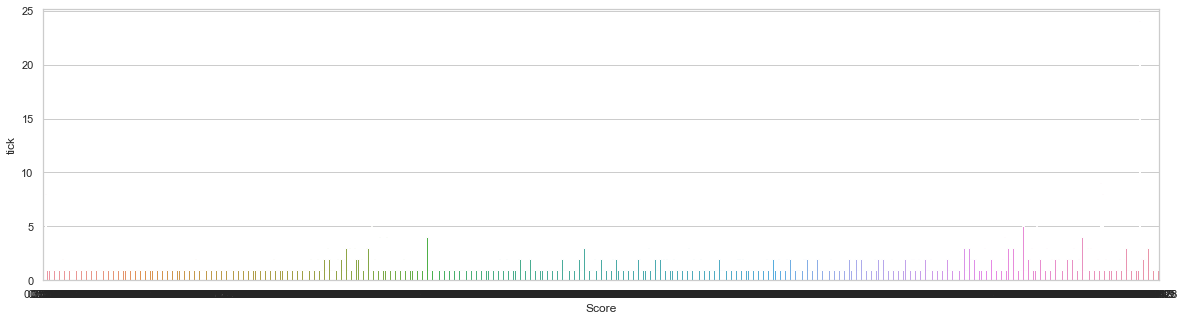

In [30]:
a4_dims = (20, 5)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Score', y='tick', data=group_by_score, ax=ax)